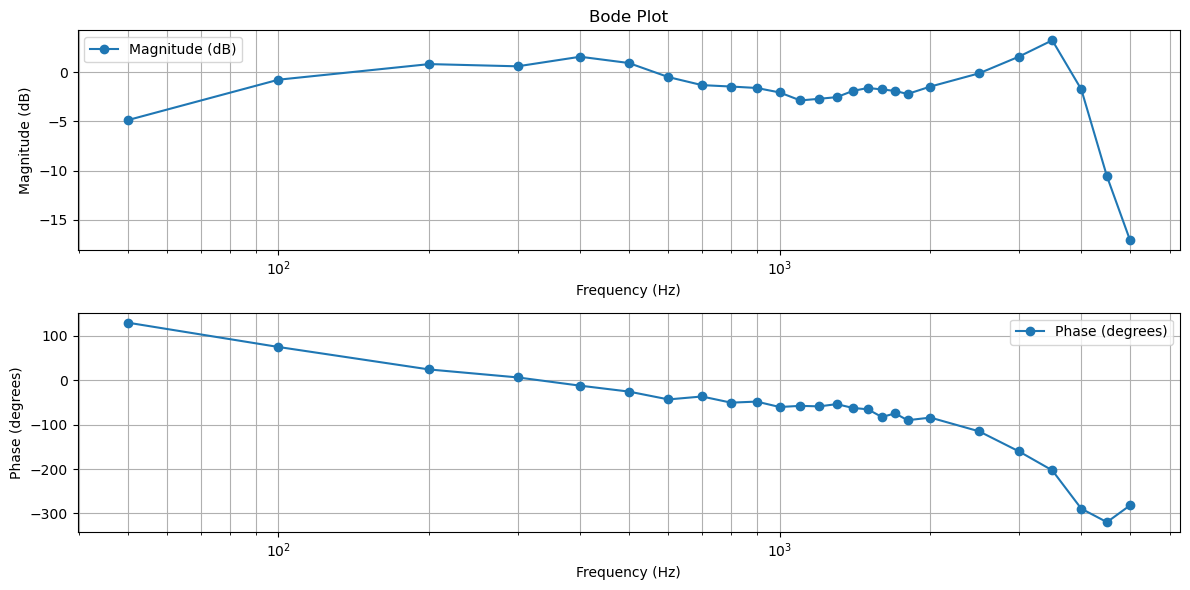

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
freq = np.array([50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,2000,2500,3000,3500,4000,4500,5000])  # Hz,
vout = np.array([1.62,2.6,3.12,3.04,3.4,3.16,2.68,2.44,2.4,2.36,2.24,2.04,2.08,2.12,2.28,2.36,2.32,2.28,2.2,2.4,2.8,3.4,4.12,2.32,0.84,0.4])  # mV,
vin = [2.84]*26  # mV
phase = np.array([-130,-75.1,-24.4,-6.53,12.1,25.4,43.1,36.5,50.4,48,60.2,57.6,58.8,53.7,62.3,65.4,82.8,74.5,90,84.1,115,160,-157+360,-70.5+360,-40.2+360,-77.8+360])  # degrees

phase = -phase 
# Calculate magnitude in dB
magnitude_dB = 20 * np.log10(np.array(vout) / np.array(vin))

# Plot Magnitude (dB) vs. Frequency (Hz)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.semilogx(freq, magnitude_dB, 'o-', label='Magnitude (dB)')
plt.title('Bode Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')
plt.legend()

# Plot Phase (degrees) vs. Frequency (Hz)
plt.subplot(2, 1, 2)
plt.semilogx(freq, phase, 'o-', label='Phase (degrees)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(which='both', axis='both')
plt.legend()

plt.tight_layout()
plt.show()

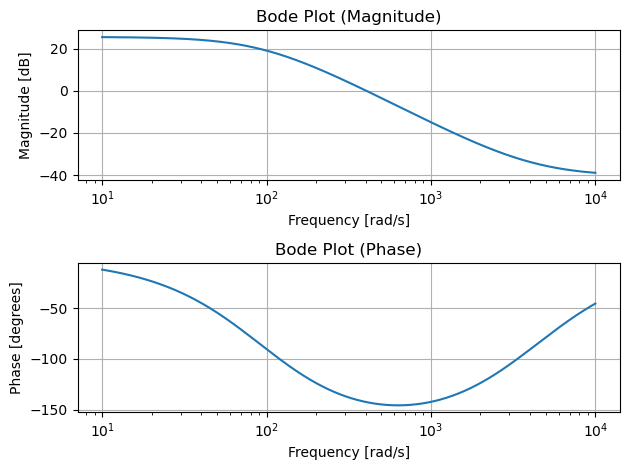

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction
from scipy import signal

# Define the values of R and C for the lag compensator


# Define the transfer function
zeros = [-100*50, -90*40]  # Example zeros
poles = [-100,-90]  # Example poles
gain = 19/(50*40)  # Exa

# Creating the transfer function
num = np.poly(zeros)  # Coefficients of the polynomial with the given zeros
den = np.poly(poles)  # Coefficients of the polynomial with the given poles

num_scaled = gain * num  # Scale the numerator coefficients by the constant

# Display the transfer function


# Display the transfer function
sys = signal.TransferFunction(num_scaled, den)  # dt=True for discrete-time systems
# Frequency range for the Bode plot
w = np.logspace(1, 4, 1000)

# Calculate the magnitude and phase of the transfer function
w, mag, phase = signal.bode(sys, w)

# Create Bode plot
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.grid()
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.title('Bode Plot (Magnitude)')

plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.grid()
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Bode Plot (Phase)')

plt.tight_layout()
plt.show()


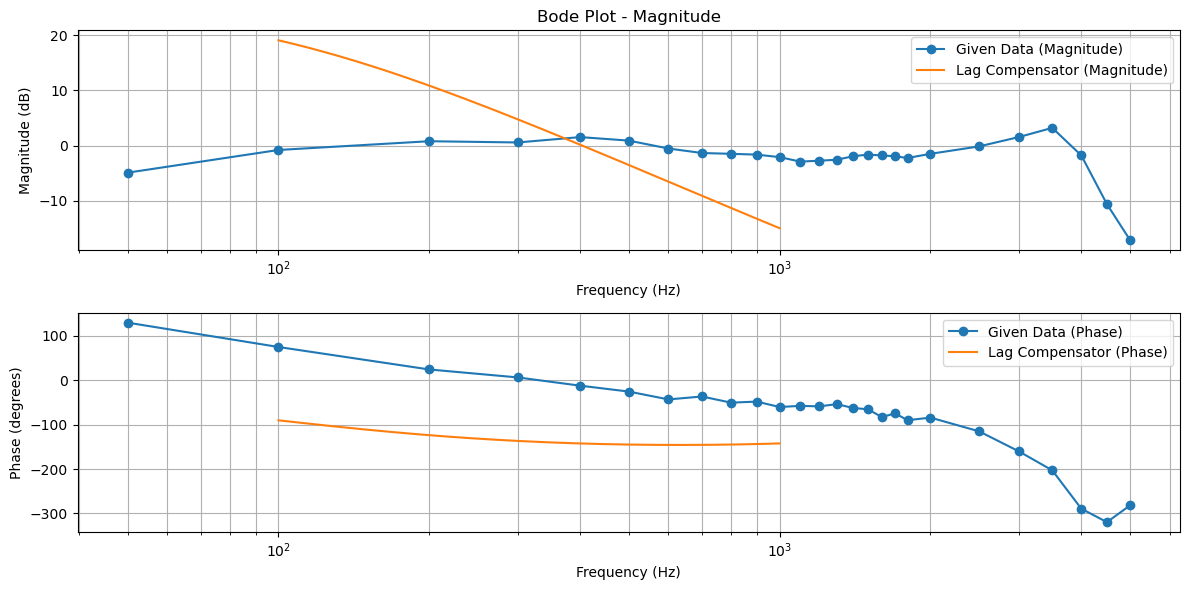

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction
from scipy import signal

# Given data
freq = np.array([50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,2000,2500,3000,3500,4000,4500,5000])  # Hz,
vout = np.array([1.62,2.6,3.12,3.04,3.4,3.16,2.68,2.44,2.4,2.36,2.24,2.04,2.08,2.12,2.28,2.36,2.32,2.28,2.2,2.4,2.8,3.4,4.12,2.32,0.84,0.4])  # mV,
vin = [2.84]*26  # mV
phase = np.array([-130,-75.1,-24.4,-6.53,12.1,25.4,43.1,36.5,50.4,48,60.2,57.6,58.8,53.7,62.3,65.4,82.8,74.5,90,84.1,115,160,-157+360,-70.5+360,-40.2+360,-77.8+360])  # degrees
phase = -phase

# Calculate magnitude in dB
magnitude_dB = 20 * np.log10(np.array(vout) / np.array(vin))

# Define the values of R and C for the lag compensator


# Define the transfer function

# Frequency range for the Bode plot
w = np.logspace(2, 3, 1000)

# Calculate the magnitude and phase of the transfer function
w, mag_compensator, phase_compensator = signal.bode(sys, w)

# Create Bode plot for the given data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.semilogx(freq, magnitude_dB, 'o-', label='Given Data (Magnitude)')
plt.semilogx(w, mag_compensator, label='Lag Compensator (Magnitude)')
plt.title('Bode Plot - Magnitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(freq, phase, 'o-', label='Given Data (Phase)')
plt.semilogx(w, phase_compensator, label='Lag Compensator (Phase)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(which='both', axis='both')
plt.legend()

plt.tight_layout()
plt.show()


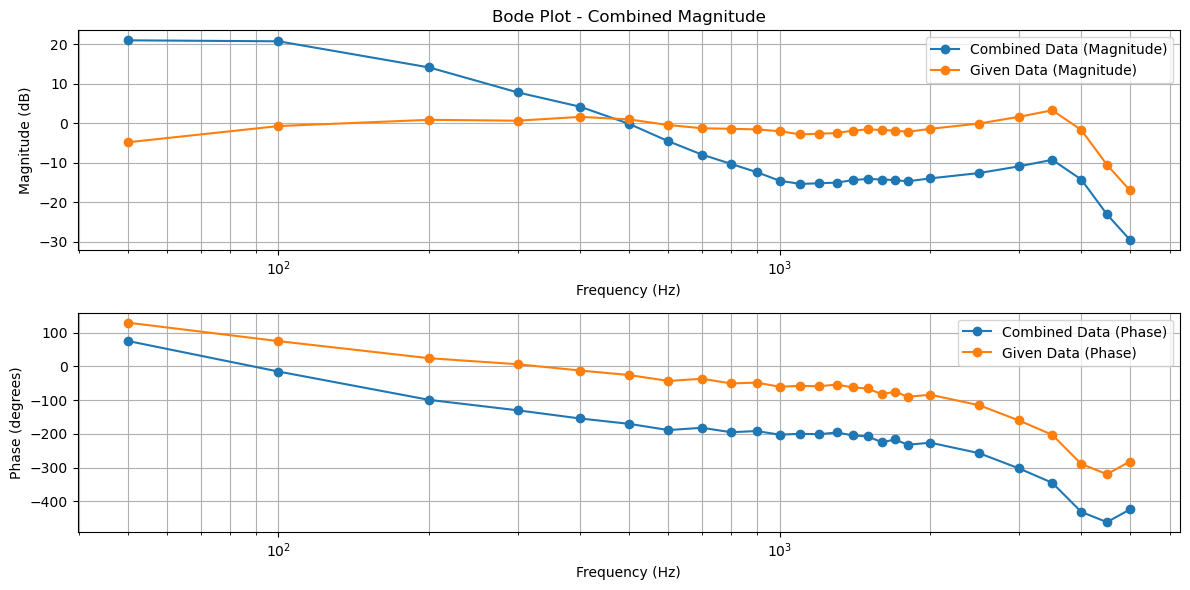

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction
from scipy import signal
from scipy.interpolate import interp1d

# Given data
freq_given =  np.array([50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,2000,2500,3000,3500,4000,4500,5000])  # Hz,
vout = np.array([1.62,2.6,3.12,3.04,3.4,3.16,2.68,2.44,2.4,2.36,2.24,2.04,2.08,2.12,2.28,2.36,2.32,2.28,2.2,2.4,2.8,3.4,4.12,2.32,0.84,0.4])  # mV,
vin = [2.84]*26  # mV
phase_given = np.array([-130,-75.1,-24.4,-6.53,12.1,25.4,43.1,36.5,50.4,48,60.2,57.6,58.8,53.7,62.3,65.4,82.8,74.5,90,84.1,115,160,-157+360,-70.5+360,-40.2+360,-77.8+360])  # degrees
phase_given =  - phase_given

# Calculate magnitude in dB for given data
magnitude_dB = 20 * np.log10(vout / np.array(vin))


# Define the transfer function for the lag compensator
zeros = [-100*50, -90*40]  # Example zeros
poles = [-100,-90]  # Example poles
gain = 25/(40*50)  # Exa

# Creating the transfer function
num = np.poly(zeros)  # Coefficients of the polynomial with the given zeros
den = np.poly(poles)  # Coefficients of the polynomial with the given poles

num_scaled = gain * num  # Scale the numerator coefficients by the constant

# Display the transfer function
sys_compensator = signal.TransferFunction(num_scaled, den)  # dt=True for discrete-time systems



# Frequency range for the Bode plot
w = np.logspace(-2, 3, 1000)

# Calculate the magnitude and phase of the transfer function for the lag compensator
w, mag_compensator, phase_compensator = signal.bode(sys_compensator, w)

# Interpolate the calculated magnitude and phase values to match the given data frequencies
mag_interpolated = np.interp(freq_given, w, mag_compensator)
phase_interpolated = np.interp(freq_given, w, phase_compensator)

# Add the magnitude and phase of the given data and the interpolated lag compensator
combined_magnitude = magnitude_dB + mag_interpolated
combined_phase = phase_given + phase_interpolated

# Create Bode plot for the combined data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.semilogx(freq_given, combined_magnitude, 'o-', label='Combined Data (Magnitude)')
plt.semilogx(freq_given, magnitude_dB, 'o-', label='Given Data (Magnitude)')
plt.title('Bode Plot - Combined Magnitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(freq_given, combined_phase, 'o-', label='Combined Data (Phase)')
plt.semilogx(freq_given, phase_given, 'o-', label='Given Data (Phase)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(which='both', axis='both')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
zeros=[1,2]
num = np.poly(zeros)
num

array([ 1., -3.,  2.])

In [6]:
import numpy as np
from scipy.interpolate import interp1d

# Given data
x = np.array([0, 1, 2, 3, 4, 5])  # Example x values
y = np.array([0, 1, 4, 9, 16, 25])  # Example y values

# Create the interpolation function
f = interp1d(x, y)

# Given x value for interpolation
x_value_for_interpolation = 2.5

# Use the interpolation function to find the corresponding y value
y_value_for_interpolation = f(x_value_for_interpolation)

# Print the corresponding y value
print(f"At x = {x_value_for_interpolation}, y is approximately {y_value_for_interpolation}")

At x = 2.5, y is approximately 6.5


In [76]:
f = interp1d(combined_phase,freq_given)

# Given x value for interpolation
x_value_for_interpolation = -180

# Use the interpolation function to find the corresponding y value
y_value_for_interpolation = f(x_value_for_interpolation)

# Print the corresponding y value
print(f"At PHASE = {x_value_for_interpolation}, FREQ is approximately {y_value_for_interpolation}")

At PHASE = -180, FREQ is approximately 664.9177189897703


In [8]:
f = interp1d(freq_given,combined_magnitude)

# Given x value for interpolation
x_value_for_interpolation = 664.9177189897706

# Use the interpolation function to find the corresponding y value
y_value_for_interpolation = f(x_value_for_interpolation)

# Print the corresponding y value
print(f"At W_PC = {x_value_for_interpolation}, GAIN is approximately {y_value_for_interpolation}")

At W_PC = 664.9177189897706, GAIN is approximately -6.809324847114656


In [78]:
f = interp1d(freq_given,combined_magnitude)

# Given x value for interpolation
x_value_for_interpolation =100
# Use the interpolation function to find the corresponding y value
y_value_for_interpolation = f(x_value_for_interpolation)

# Print the corresponding y value
print(f"At FREQ = {x_value_for_interpolation}, GAIN is approximately {y_value_for_interpolation}")

At FREQ = 100, GAIN is approximately 20.69475707989058


In [10]:
f = interp1d(combined_magnitude,freq_given)

# Given x value for interpolation
x_value_for_interpolation =0
# Use the interpolation function to find the corresponding y value
y_value_for_interpolation = f(x_value_for_interpolation)

# Print the corresponding y value
print(f"At GAIN = {x_value_for_interpolation}, FREQ is approximately {y_value_for_interpolation}")

At GAIN = 0, FREQ is approximately 496.03868423436944


In [11]:
f = interp1d(freq_given,combined_phase)

# Given x value for interpolation
x_value_for_interpolation =496.03868423436944
# Use the interpolation function to find the corresponding y value
y_value_for_interpolation = f(x_value_for_interpolation)

# Print the corresponding y value
print(f"At FREQ = {x_value_for_interpolation},PHASE is approximately {y_value_for_interpolation}")

At FREQ = 496.03868423436944,PHASE is approximately -169.64213472359333


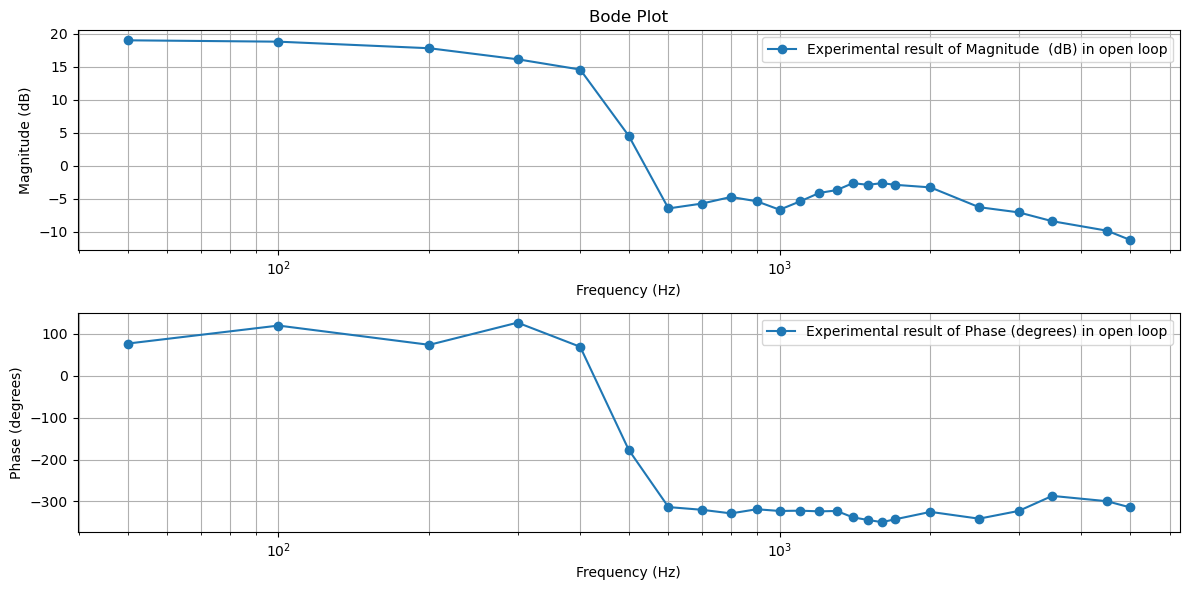

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
freq = np.array([50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,2000,2500,3000,3500,4500,5000])  # Hz,
vout = np.array([6.8,6.64,5.92,4.88,4.08,1.28,0.36,0.392,0.44,0.408,0.352,0.408,0.472,0.496,0.56,0.544,0.56,0.544,0.52,0.368,0.336,0.288,0.244,0.208])  # mV,
vin = [0.76]*24  # mV
phase = np.array([-77,-120,-74,-127,-69.3,177,-46.5+360,-40+360,-31.4+360,-41.3+360,-37.2+360,-37.9+360,-36.3+360,-37.2+360,-22+360,-15.7+360,-10.5+360,-17.3+360,-35+360,-18.8+360,-37.3+360,-73.2+360,-60.5+360,-45.9+360])
phase = -phase 
# Calculate magnitude in dB
magnitude_dB = 20 * np.log10(np.array(vout) / np.array(vin))

# Plot Magnitude (dB) vs. Frequency (Hz)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.semilogx(freq, magnitude_dB, 'o-', label='Experimental result of Magnitude  (dB) in open loop')
plt.title('Bode Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')
plt.legend()

# Plot Phase (degrees) vs. Frequency (Hz)
plt.subplot(2, 1, 2)
plt.semilogx(freq, phase, 'o-', label='Experimental result of Phase (degrees) in open loop')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(which='both', axis='both')
plt.legend()

plt.tight_layout()
plt.show()

In [95]:
f = interp1d(freq,phase)

# Given x value for interpolation
x_value_for_interpolation =1500.0
# Use the interpolation function to find the corresponding y value
y_value_for_interpolation = f(x_value_for_interpolation)

# Print the corresponding y value
print(f"At ph = {x_value_for_interpolation},freq is approximately {y_value_for_interpolation}")

At ph = 1500.0,freq is approximately -77.2


In [94]:
f = interp1d(magnitude_dB,freq)

# Given x value for interpolation
x_value_for_interpolation = 0
# Use the interpolation function to find the corresponding y value
y_value_for_interpolation = f(x_value_for_interpolation)

# Print the corresponding y value
print(f"At FREQ = {x_value_for_interpolation} gain is approximately {y_value_for_interpolation}")

At FREQ = 0 gain is approximately 1500.0


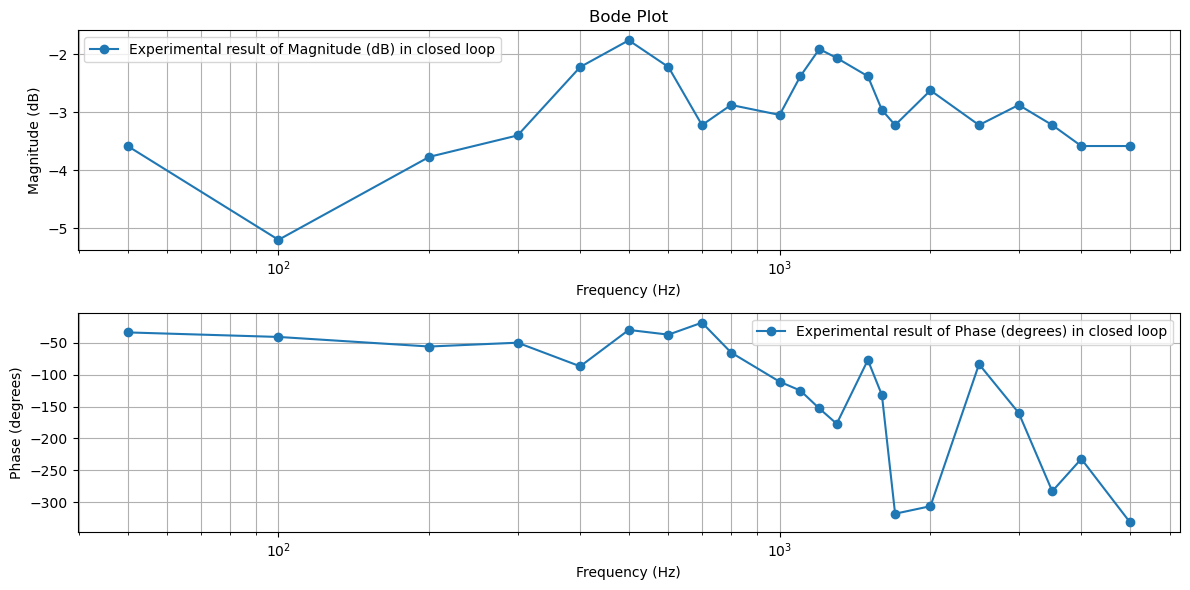

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
freq = np.array([50,100,200,300,400,500,600,700,800,1000,1100,1200,1300,1500,1600,1700,2000,2500,3000,3500,4000,5000])  # Hz,
vout = np.array([1.88,1.56,1.84,1.92,2.2,2.32,2.2,1.96,2.04,2,2.16,2.28,2.24,2.16,2.02,1.96,2.1,1.96,2.04,1.96,1.88,1.88])  # V,
vin = [2.84]*22  # V
phase = np.array([-33.9,-41,-56,-50,-87,-30,-37.4,-18.6,-65.4,-111.1,-125,-153,-177,-77.2,-132,42.1-360,53.9-360,-83.7,-160,77.3-360,128-360,28.9-360])

# Calculate magnitude in dB
magnitude_dB = 20 * np.log10(np.array(vout) / np.array(vin))

# Plot Magnitude (dB) vs. Frequency (Hz)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.semilogx(freq, magnitude_dB, 'o-', label='Experimental result of Magnitude (dB) in closed loop')
plt.title('Bode Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')
plt.legend()

# Plot Phase (degrees) vs. Frequency (Hz)
plt.subplot(2, 1, 2)
plt.semilogx(freq, phase, 'o-', label='Experimental result of Phase (degrees) in closed loop')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(which='both', axis='both')
plt.legend()

plt.tight_layout()
plt.show()

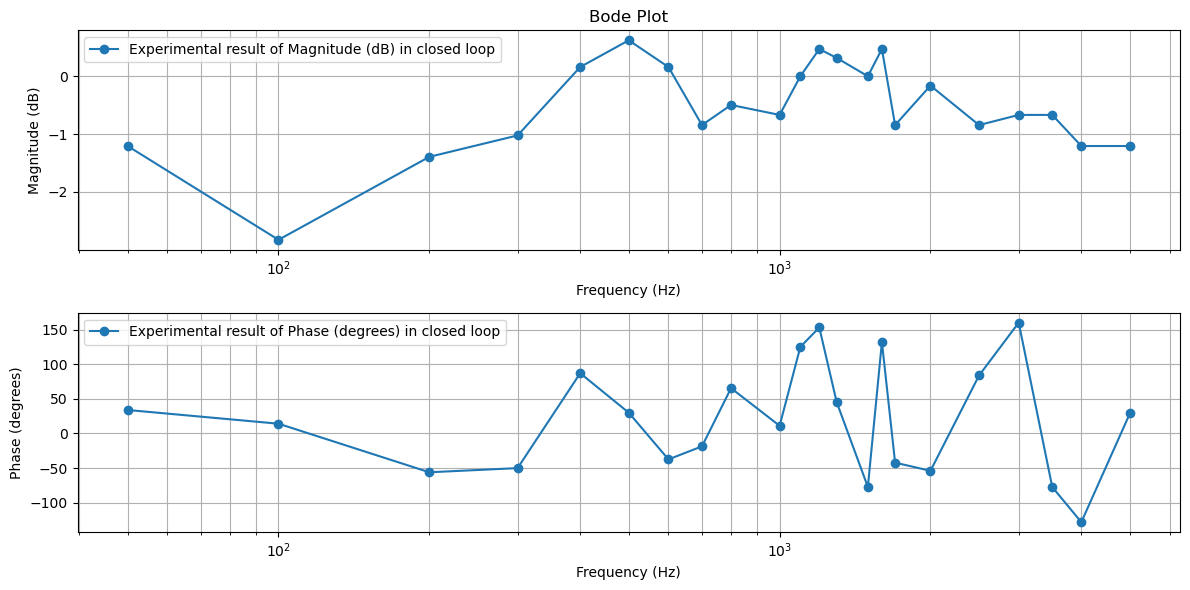

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
freq = np.array([50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,2000,2500,3000,3500,4500,5000])  # Hz,
vout = np.array([6.8,6.64,5.92,4.88,4.08,1.28,0.36,0.392,0.44,0.408,0.352,0.408,0.472,0.496,0.56,0.544,0.56,0.544,0.52,0.368,0.336,0.288,0.244,0.208])  # mV,
vin = [0.76]*24  # mV
phase = np.array([-77,-120,-74,-127,-69.3,-177,46.5-360,40-360,31.4-360,41.3-360,37.2-360,37.9-360,36.3-360,37.2-360,22-360,15.7-360,10.5-360,17.3-360,35-360,18.8-360,37.3-360,73.2-360,60.5-360,45.9-360])

# Calculate magnitude in dB
magnitude_dB = 20 * np.log10(np.array(vout) / np.array(vin))

# Plot Magnitude (dB) vs. Frequency (Hz)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.semilogx(freq, magnitude_dB, 'o-', label='Experimental result of Magnitude (dB)')
plt.title('Bode Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')
plt.legend()

# Plot Phase (degrees) vs. Frequency (Hz)
plt.subplot(2, 1, 2)
plt.semilogx(freq, phase, 'o-', label='Experimental result of Phase (degrees)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(which='both', axis='both')
plt.legend()

plt.tight_layout()
plt.show()